In [ ]:
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt
import skimage.metrics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.




metrics for noisy image
mse=788.2502101723413
psnr=19.164162656513607
ssim=0.36013344320420454


metrics for enhanced image
mse=338.1450201096719
psnr=22.83977364951042
ssim=0.43571100884402153




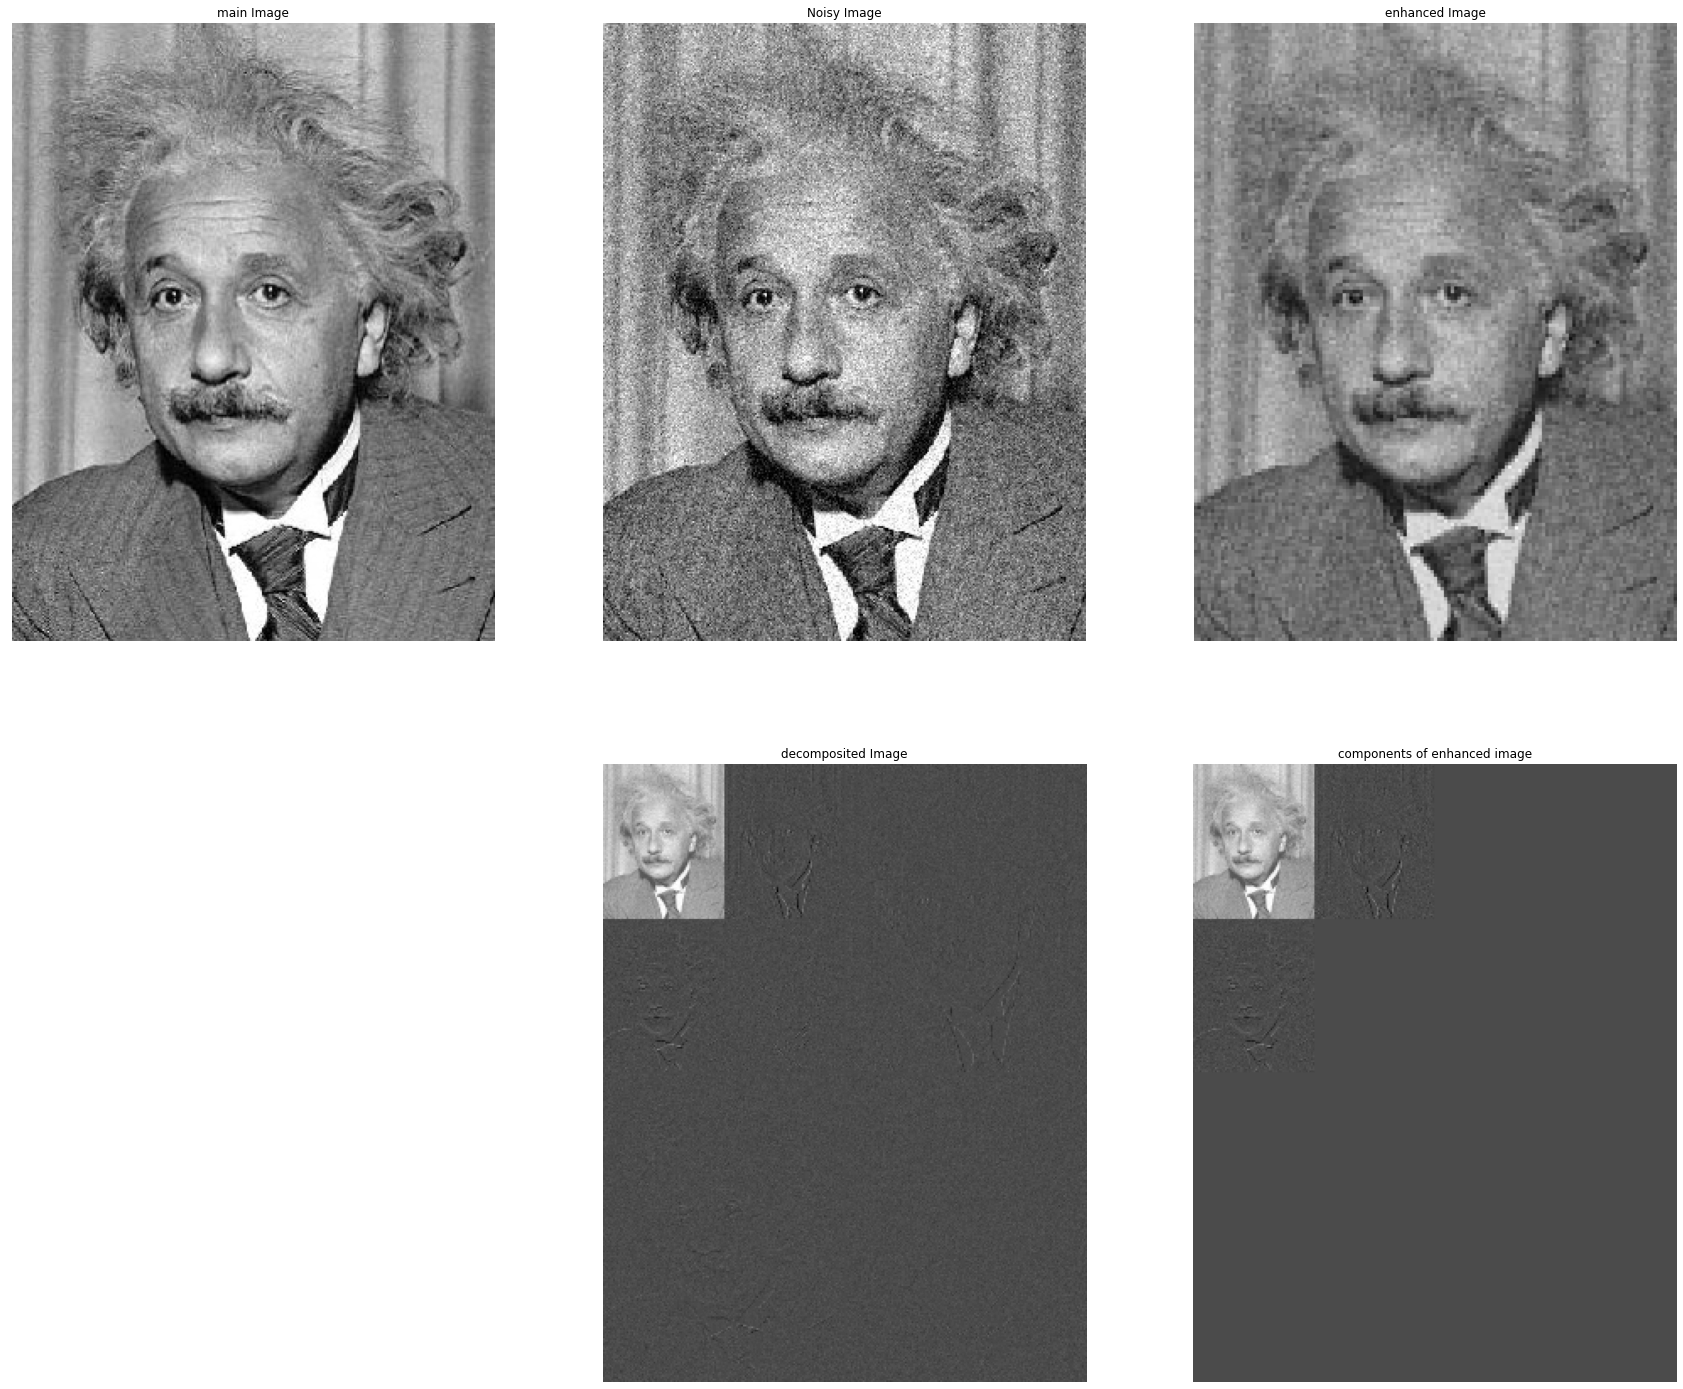

In [ ]:
image = cv2.imread('noisyImg.jpg', cv2.IMREAD_GRAYSCALE)
real = cv2.imread('realImg.jpg', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(2, 3, figsize=(30, 25))
axes[1, 0].set_axis_off()

# show main image
axes[0, 0].imshow(real, cmap='gray')
axes[0, 0].set_title('main Image')
axes[0, 0].set_axis_off()

# show noisy image
axes[0, 1].imshow(image, cmap='gray')
axes[0, 1].set_title('Noisy Image')
axes[0, 1].set_axis_off()

# image decomposition by haar wavelet transform
decomposited_image = pywt.wavedec2(image, 'haar', level=2)

# show decomposited components
arr, slices = pywt.coeffs_to_array(decomposited_image)
axes[1, 1].imshow(arr, cmap='gray')
axes[1, 1].set_title('decomposited Image')
axes[1, 1].set_axis_off()

# extract coefficients list from decomposited image
[cA2, (cH2, cV2, cD2),(cH1, cV1, cD1)] = decomposited_image

# define zero matrices to replace with some coefficients
Level2_zero=np.zeros_like(cH2)
Level1_zero=np.zeros_like(cH1)

# rebuild decomposited image with new coefficients
rebuilded_image = [cA2, (cH2, cV2, Level2_zero),(Level1_zero, Level1_zero, Level1_zero)]

# reconstruct enhanced image
enhanced_image = pywt.waverec2(rebuilded_image, 'haar')

# show enhanced image
axes[0, 2].imshow(enhanced_image, cmap='gray')
axes[0, 2].set_title('enhanced Image')
axes[0, 2].set_axis_off()

# show enhanced image components
arr, slices = pywt.coeffs_to_array(rebuilded_image)
axes[1, 2].imshow(arr, cmap='gray')
axes[1, 2].set_title('components of enhanced image')
axes[1, 2].set_axis_off()

# evaluate by criteries #
mse_noisy = skimage.metrics.mean_squared_error(image,real)
psnr_noisy = skimage.metrics.peak_signal_noise_ratio(real,image)
ssim_noisy = skimage.metrics.structural_similarity(image,real)

mse_enhanced = skimage.metrics.mean_squared_error(enhanced_image,real)
psnr_enhanced = skimage.metrics.peak_signal_noise_ratio(real,enhanced_image)
ssim_enhanced = skimage.metrics.structural_similarity(enhanced_image,real)

print("\n")
print("metrics for noisy image")
print("mse={}".format(mse_noisy))
print("psnr={}".format(psnr_noisy))
print("ssim={}".format(ssim_noisy))

print("\n")
print("metrics for enhanced image")
print("mse={}".format(mse_enhanced))
print("psnr={}".format(psnr_enhanced))
print("ssim={}".format(ssim_enhanced))

print("\n")